In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [2]:
df_rt = pd.read_csv('RTs.csv')


In [47]:
df_rt

,Unnamed: 0,participant_id,condition,Trial,ITs,block,MTs
0,0,0,Sudden,0,0.000074,0,0.180820
1,1,1,Gradual,0,0.000075,0,0.274499
2,2,2,Sudden,0,0.000134,0,0.124207
3,3,3,Gradual,0,0.883418,0,0.133209
4,4,4,Sudden,0,0.920651,0,1.510810
...,...,...,...,...,...,...,...
10747,10747,9,Gradual,767,0.780795,11,0.190099
10748,10748,10,Sudden,767,0.733294,11,0.150234
10749,10749,11,Gradual,767,1.200126,11,0.216987
10750,10750,12,Sudden,767,0.560747,11,0.350405


In [54]:
df_mean_rts = df_rt.groupby(['block', 'participant_id', 'condition']).mean().reset_index()

In [55]:
df_mean_rts

,block,participant_id,condition,Unnamed: 0,Trial,ITs,MTs
0,0,0,Sudden,441.0,31.5,0.030669,0.047369
1,0,1,Gradual,442.0,31.5,0.032213,0.013919
2,0,2,Sudden,443.0,31.5,0.000002,0.001941
3,0,3,Gradual,444.0,31.5,0.816977,1.559555
4,0,4,Sudden,445.0,31.5,0.771165,0.756828
...,...,...,...,...,...,...,...
163,11,9,Gradual,10306.0,735.5,0.902405,0.387638
164,11,10,Sudden,10307.0,735.5,1.124377,0.268017
165,11,11,Gradual,10308.0,735.5,1.040078,0.328077
166,11,12,Sudden,10309.0,735.5,0.850612,0.403674


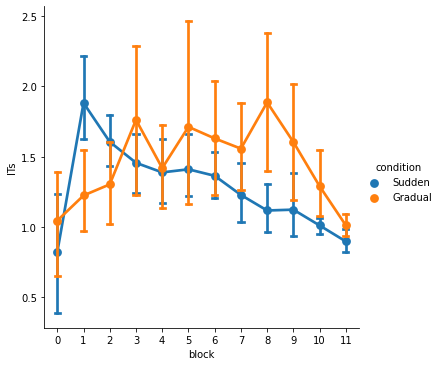

In [56]:
sns.catplot(x = 'block', y = 'ITs', hue = 'condition', data = df_mean_rts, kind = 'point', ci = 95, capsize = 0.2)

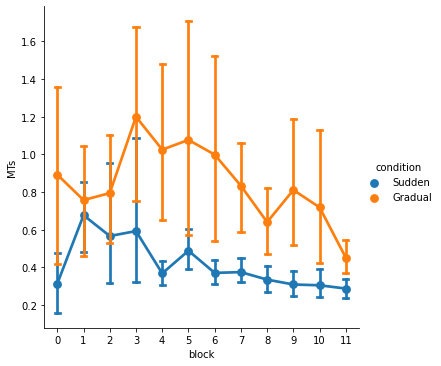

In [58]:
sns.catplot(x = 'block', y = 'MTs', hue = 'condition', data = df_mean_rts, kind = 'point', ci = 95, capsize = 0.2)

In [2]:
error_df = pd.read_csv('Angular_errors.csv')

In [6]:
error_df['Rotation'] = error_df['Rotation']+'_Accuracy'

In [3]:
df_mean_errors = error_df.groupby(['Block_no', 'Participant_Id', 'Rotation']).mean().reset_index()

In [4]:
df_mean_errors['Rotation'] = df_mean_errors['Rotation']+'_Accuracy'

Text(0.5, 1.0, 'No Feedback')

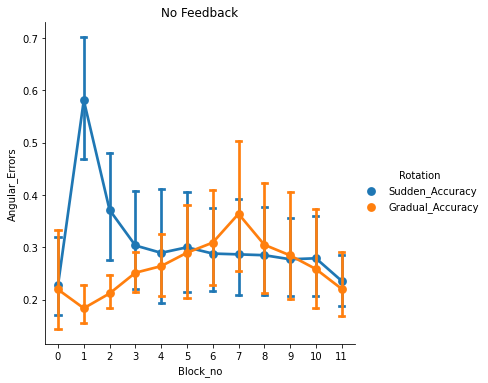

In [5]:
sns.catplot(x = 'Block_no', y = 'Angular_Errors', 
            hue = 'Rotation', 
            data = df_mean_errors, kind = 'point', 
            ci = 95, capsize = 0.2, 
           )
plt.title('No Feedback')

Text(0.5, 1.0, 'No Feedback')

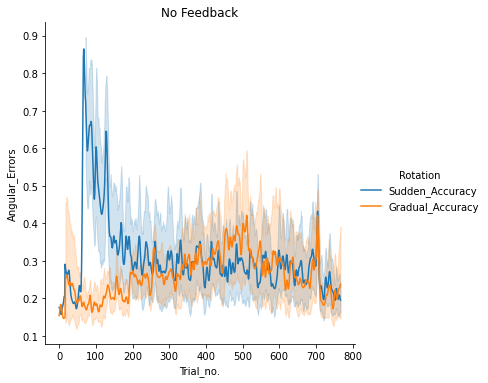

In [7]:
sns.relplot(x = 'Trial_no.', y = 'Angular_Errors', hue = 'Rotation', data = error_df, kind = 'line')
plt.title('No Feedback')

Text(0.5, 1.0, 'Block 11: Transfer')

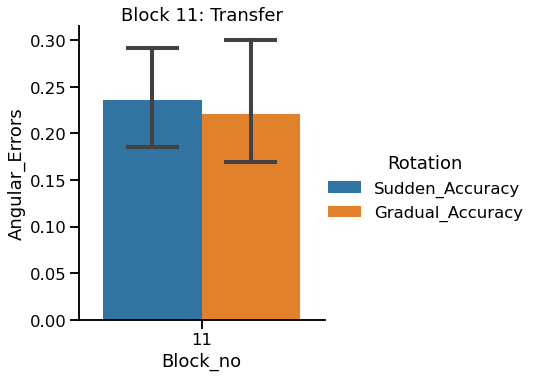

In [18]:
sns.set_context('talk')
sns.catplot(x = 'Block_no', y = 'Angular_Errors', 
            hue = 'Rotation', 
            data = df_mean_errors[df_mean_errors['Block_no'] == 11], kind = 'bar', 
            ci = 95, capsize = 0.2, 
           )
plt.title('Block 11: Transfer')